In [1]:
import numpy as np
import pandas as pd

# Data Visualizations in Python

Relevant libraries: pandas, matplotlib, seaborn. of course there are plenty more for all kinds of use cases, but these are the central ones for our purposes

In [4]:
import sqlite3
conn = sqlite3.connect(r'C:\Users\ydool\Downloads\workshop_db.db')

In [6]:
pd.read_sql("""select  brand,count(r.product_id)
from products  p
join reviews r on p.product_id=r.product_id
group by 1""", conn)

,brand,count(r.product_id)
0,Apple,1011
1,Google,1194
2,Huawei,1074
3,OnePlus,1282
4,Oppo,1248
5,Samsung,1166
6,Sony,1286
7,Xiaomi,1137


In [8]:
num_reviews_by_brand =  pd.read_sql("""select  brand,count(r.product_id) as review_cnt
from products  p
join reviews r on p.product_id=r.product_id
group by 1""", conn)

In [20]:
num_reviews_by_brand

,brand,review_cnt
0,Apple,1011
1,Google,1194
2,Huawei,1074
3,OnePlus,1282
4,Oppo,1248
5,Samsung,1166
6,Sony,1286
7,Xiaomi,1137


In [10]:
import matplotlib.pyplot as plt

<Axes: >

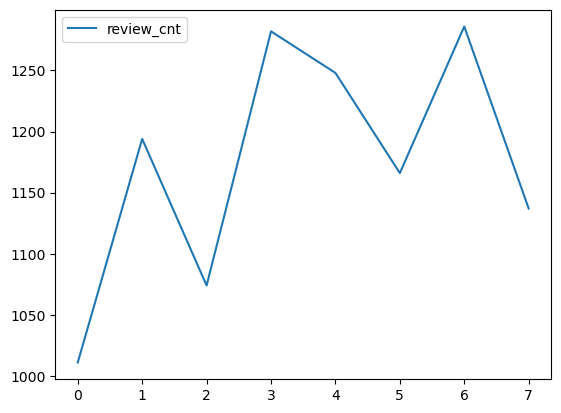

In [94]:
num_reviews_by_brand.plot()

<Axes: xlabel='brand'>

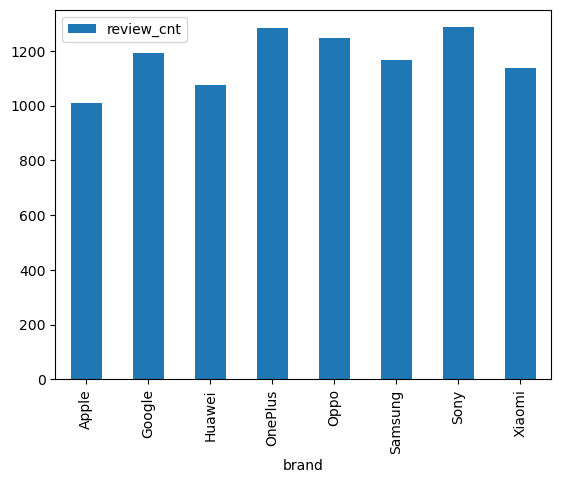

In [14]:
num_reviews_by_brand.plot(kind='bar', x='brand', y='review_cnt')

<Axes: title={'center': '#Reviews per Brand'}, xlabel='brand'>

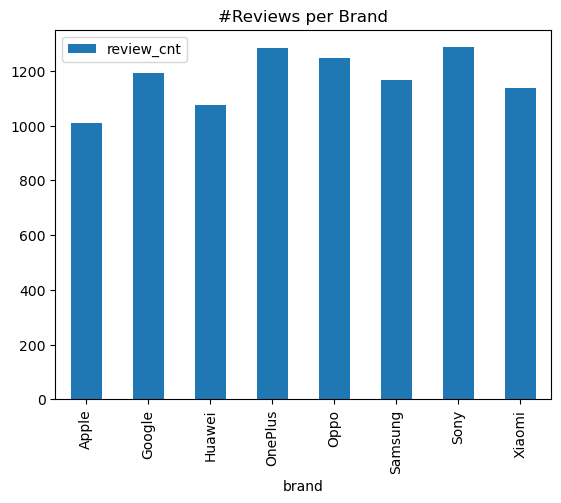

In [16]:
num_reviews_by_brand.plot(kind='bar', x='brand', y='review_cnt', title = '#Reviews per Brand')

<Axes: title={'center': '#Reviews per Brand'}, xlabel='brand'>

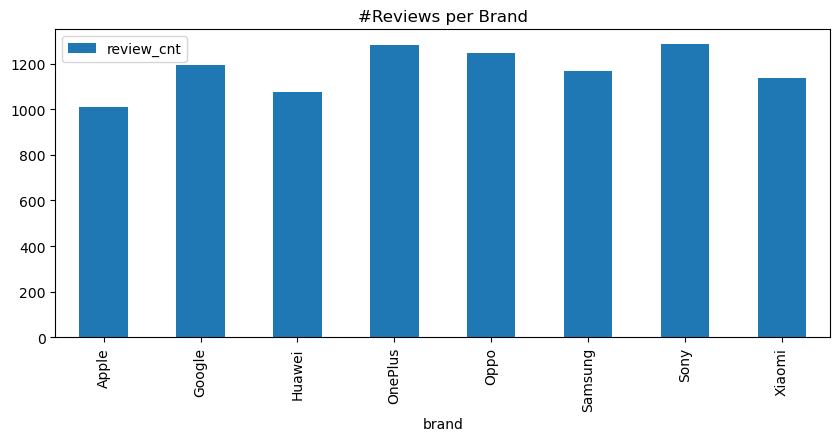

In [18]:
num_reviews_by_brand.plot(kind='bar', x='brand', y='review_cnt', title = '#Reviews per Brand', figsize = (10,4))

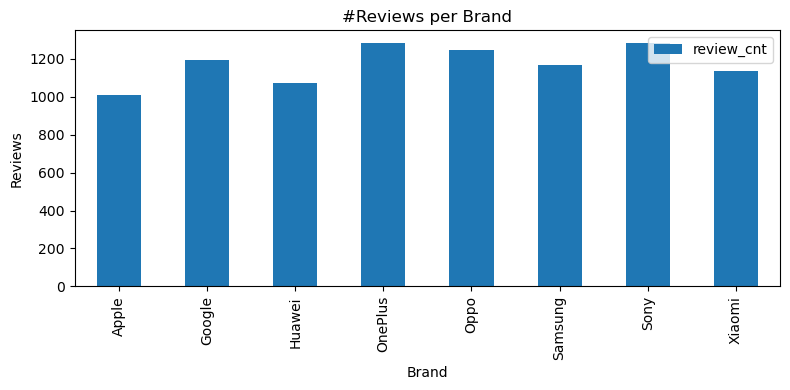

In [22]:
num_reviews_by_brand.plot(kind='bar', x='brand', y='review_cnt', title = '#Reviews per Brand', figsize = (8,4))
plt.ylabel('Reviews')
plt.xlabel('Brand')
plt.tight_layout()
plt.show()

In [24]:
num_reviews_by_brand_sorted  = num_reviews_by_brand.sort_values('review_cnt', ascending=False)

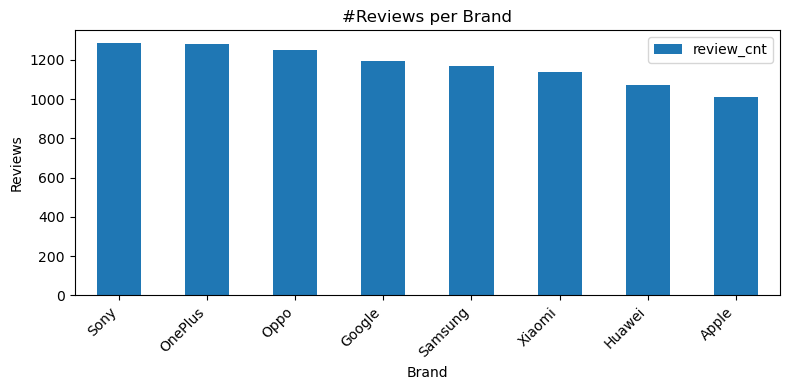

In [26]:
num_reviews_by_brand_sorted.plot(kind='bar', x='brand', y='review_cnt', title = '#Reviews per Brand', figsize = (8,4))
plt.ylabel('Reviews')
plt.xlabel('Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Putting them in an HTML report

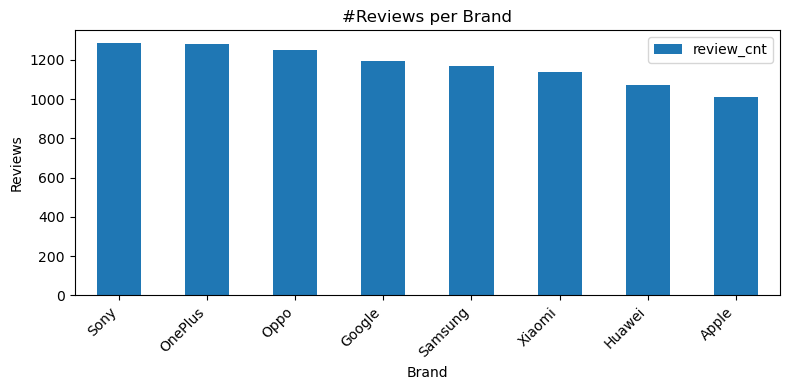

In [28]:
num_reviews_by_brand_sorted.plot(kind='bar', x='brand', y='review_cnt', title = '#Reviews per Brand', figsize = (8,4))
plt.ylabel('Reviews')
plt.xlabel('Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plot_path = 'reviews_per_brand.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [34]:
num_reviews_by_brand_sorted

,Brand,#Reviews
6,Sony,1286
3,OnePlus,1282
4,Oppo,1248
1,Google,1194
5,Samsung,1166
7,Xiaomi,1137
2,Huawei,1074
0,Apple,1011


In [32]:
num_reviews_by_brand_sorted.columns=['Brand', '#Reviews']

In [36]:
table_html = num_reviews_by_brand_sorted.to_html(index=False)

In [40]:
print(table_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Brand</th>
      <th>#Reviews</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Sony</td>
      <td>1286</td>
    </tr>
    <tr>
      <td>OnePlus</td>
      <td>1282</td>
    </tr>
    <tr>
      <td>Oppo</td>
      <td>1248</td>
    </tr>
    <tr>
      <td>Google</td>
      <td>1194</td>
    </tr>
    <tr>
      <td>Samsung</td>
      <td>1166</td>
    </tr>
    <tr>
      <td>Xiaomi</td>
      <td>1137</td>
    </tr>
    <tr>
      <td>Huawei</td>
      <td>1074</td>
    </tr>
    <tr>
      <td>Apple</td>
      <td>1011</td>
    </tr>
  </tbody>
</table>


In [42]:
html = f"""
<html>
<head><title>Brand Reviews Report</title></head>
<body>
<h1>#Reviews per Brand</h1>
<p>This report summarizes the number of reviews per brand.</p>
{table_html}
<img src="reviews_per_brand.png" width="600">
</body>
</html>
"""

In [48]:
html2 = f"""
<html>
<head>
<title>Brand Reviews Report</title>
<style>
  body {{ font-family: Arial, sans-serif; background: #f8f8f8; color: #222; }}
  h1 {{ color: #0055a5; }}
  table {{ border-collapse: collapse; width: 80%; margin: 20px auto; box-shadow: 0 2px 8px rgba(0,0,0,0.1); }}
  th, td {{ border: 1px solid #ccc; padding: 8px; text-align: center; }}
  th {{ background: #e5eaf1; color: #333; }}
  img {{ display: block; margin: 30px auto; border-radius: 8px; }}
</style>
</head>
<body>
<h1>#Reviews per Brand</h1>
<p>This report summarizes the number of reviews per brand.</p>
{table_html}
<img src="reviews_per_brand.png" width="600">
</body>
</html>
"""


In [44]:
from IPython.display import display, HTML
display(HTML(html))

Brand,#Reviews
Sony,1286
OnePlus,1282
Oppo,1248
Google,1194
Samsung,1166
Xiaomi,1137
Huawei,1074
Apple,1011


In [50]:
display(HTML(html2))

Brand,#Reviews
Sony,1286
OnePlus,1282
Oppo,1248
Google,1194
Samsung,1166
Xiaomi,1137
Huawei,1074
Apple,1011


In [46]:
with open("brand_reviews_report.html", "w", encoding="utf-8") as f:
    f.write(html)

In [52]:
with open("brand_reviews_report2.html", "w", encoding="utf-8") as f:
    f.write(html2)

# QA checks

### I write this things as internal tools for myself, so this reflects only how i find it most comfortable to work:
* Get an overview and a few views of the data that help me understand the bigger picture
* Run super specific checks that reflect my expectations of the data and things i want to catch

In [54]:
df = pd.read_sql("select * from labeled_data", conn)

In [58]:
df.iloc[0]

review_id                              93541409-6a2e-42fc-9026-dc2feb6864a3
product_id                             2b508863-a697-4531-a6c6-577da6710aeb
review_text               "This Sony Xperia L4 White is an excellent pho...
brand                                                                  Sony
model                                                             Xperia L4
color                                                                 White
brand_mentioned                                                         yes
model_mentioned                                                          no
color_mentioned                                                         yes
sentiment                                                          positive
sentiment_intensity                                                      no
price_mentioned                                                         yes
competitor_mentioned                                                    yes
battery_life

In [66]:
df.groupby(['brand','sentiment']).size().reset_index()

,brand,sentiment,0
0,Apple,negative,8
1,Apple,neutral,13
2,Apple,positive,58
3,Apple,unclear,5
4,Google,negative,10
5,Google,neutral,15
6,Google,positive,86
7,Google,unclear,12
8,Huawei,negative,16
9,Huawei,neutral,14


In [62]:
df.groupby(['brand', 'brand_mentioned']).size().reset_index().sort_values(by='brand', ascending=False)

,brand,brand_mentioned,0
19,Xiaomi,yes,92
18,Xiaomi,no,20
17,Sony,yes,97
16,Sony,unclear,1
15,Sony,no,24
14,Samsung,yes,85
13,Samsung,unclear,1
12,Samsung,no,35
11,Oppo,yes,95
10,Oppo,unclear,1


In [80]:
cols = ['brand','model','color','fake_sounding','sentiment', 'brand_mentioned','color_mentioned', 'review_text']

In [82]:
df[(df['fake_sounding']=='yes') & (df['sentiment']=='positive')][cols]

,brand,model,color,fake_sounding,sentiment,brand_mentioned,color_mentioned,review_text
0,Sony,Xperia L4,White,yes,positive,yes,yes,"""This Sony Xperia L4 White is an excellent pho..."
1,Google,Pixel 5a 5G,Green,yes,positive,yes,no,"""The phone I recently acquired from the Google..."
5,Xiaomi,Redmi Note 8,Silver,yes,positive,yes,yes,"""The XiaoMi Redmi Note 8 Silver 256 is an exce..."
6,Apple,iPhone 6,Red,yes,positive,yes,yes,"""Being the proud owner of an Apple iPhone 6 Re..."
11,Xiaomi,Redmi 9A,Black,yes,positive,no,yes,"""The phone XiaoMI Redmi 9A Black 32 is a fanta..."
...,...,...,...,...,...,...,...,...
929,Xiaomi,Redmi Note 9,Gold,yes,positive,no,no,"""Thanks to its great camera and powerful perfo..."
931,Sony,Xperia XZ Premium,Silver,yes,positive,yes,unclear,"""Just had to give this phone a test drive afte..."
932,OnePlus,OnePlus 7T,Blue,yes,positive,yes,yes,"""This smartphone is an excellent choice if you..."
933,Oppo,Oppo F15,Red,yes,positive,no,yes,"""The Oppo Oppo F15 Red 128 is a high-performin..."


In [84]:
positive_sentiment_fake_sounding = df[(df['fake_sounding']=='yes') & (df['sentiment']=='positive')][cols].copy()

In [86]:
df[df['color_mentioned']=='unclear'][cols]

,brand,model,color,fake_sounding,sentiment,brand_mentioned,color_mentioned,review_text
7,Xiaomi,Redmi 9A,Green,no,positive,yes,unclear,"""The sound quality on this phone is poor, with..."
120,Xiaomi,Mi Mix 4,Black,no,positive,yes,unclear,My experience using the new Xiaoomi Mi Mix 4 B...
129,Xiaomi,Redmi 9,Gold,yes,positive,yes,unclear,"Great! With its 256GB storage capacity, you'll..."
291,OnePlus,OnePlus 6T,Gold,no,unclear,yes,unclear,"Customer: ""As an avid user of the OnePlus 6T, ..."
697,Oppo,Oppo Reno 4,Black,yes,positive,yes,unclear,"""This phone is an excellent value for the mone..."
768,OnePlus,OnePlus 3,Red,yes,positive,yes,unclear,"""Comparing the OnePlus OnePlus 3 to other smar..."
836,Oppo,Oppo A53,Green,yes,neutral,yes,unclear,"""This OpPo phone is a total waste of money and..."
931,Sony,Xperia XZ Premium,Silver,yes,positive,yes,unclear,"""Just had to give this phone a test drive afte..."


In [88]:
unclear_color = df[df['color_mentioned']=='unclear'].copy()

### Exporting data to CSV

In [90]:
unclear_color.to_csv('Unclear color.csv', index=False)

### Exporting data to Excel so that you can have several sheets in 1 file

In [92]:
with pd.ExcelWriter('workshop output.xlsx') as writer:
    positive_sentiment_fake_sounding.to_excel(writer, sheet_name='Positive_Fake_Sounding', index=False)
    unclear_color.to_excel(writer, sheet_name='Unclear_Color', index=False)